In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
df.shape

(20640, 10)

In [5]:
df['ocean_proximity'].count()

20640

In [6]:
df['ocean_proximity'].isna().sum()

0

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
encoder = OneHotEncoder(sparse_output=False)

In [9]:
# encoder.fit_transform(df['ocean_proximity']) - err

In [10]:
# df['ocean_proximity'].reshape(-1,1) - err

In [11]:
import numpy as np
np.array([1,2,3,4]).reshape(-1,1)

array([[1],
       [2],
       [3],
       [4]])

In [12]:
df['ocean_proximity'].values

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [13]:
type(df['ocean_proximity'].values)

numpy.ndarray

In [14]:
df['ocean_proximity'].values.reshape(-1,1)

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [15]:
encoded_data = encoder.fit_transform(df['ocean_proximity'].values.reshape(-1,1))
encoded_data

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [16]:
new_columns = encoder.get_feature_names_out()
new_columns

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [17]:
ocean_df = pd.DataFrame(encoded_data,columns=new_columns)
ocean_df.head()

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [18]:
df = df.drop(columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [19]:
df[new_columns] = ocean_df.iloc[:,:]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
x0_<1H OCEAN            0
x0_INLAND               0
x0_ISLAND               0
x0_NEAR BAY             0
x0_NEAR OCEAN           0
dtype: int64

In [21]:
# 207 is fairly low number of rows having NA so let drop this rows

In [22]:
df = df.loc[~df['total_bedrooms'].isna()]
df.shape

(20433, 14)

In [23]:
20640-207, 10-1+5

(20433, 14)

In [24]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
x0_<1H OCEAN          0
x0_INLAND             0
x0_ISLAND             0
x0_NEAR BAY           0
x0_NEAR OCEAN         0
dtype: int64

In [25]:
import seaborn as sns

/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nikhil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

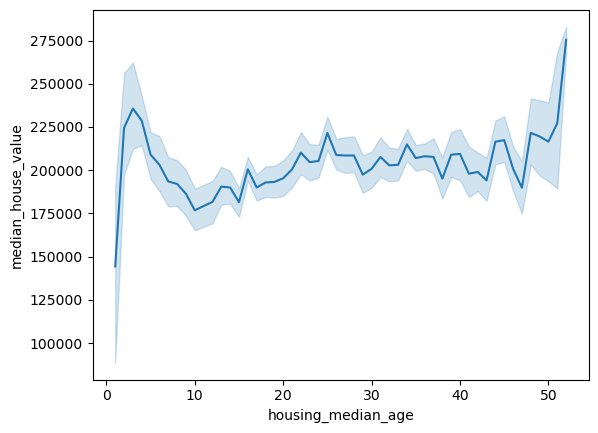

In [44]:
sns.lineplot(x='housing_median_age', y='median_house_value', data=df)

In [27]:
df.corr()['median_house_value'].sort_values()

x0_INLAND            -0.484787
latitude             -0.144638
longitude            -0.045398
population           -0.025300
x0_ISLAND             0.023525
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
x0_NEAR OCEAN         0.140378
x0_NEAR BAY           0.160526
x0_<1H OCEAN          0.257614
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("housing.csv")

df = df.loc[~df['total_bedrooms'].isna()]

price = df['median_house_value']
df.drop(columns=['median_house_value'], inplace=True)
df['median_house_value'] = price

features = df.iloc[:,:-1]
labels = df.iloc[:,-1]

numeric_col = features.columns[:-1]
category_col = features.columns[-1:]

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=42)

In [30]:
train_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN


In [31]:
train_y.head()

17727    227600.0
2057     110400.0
6453     248100.0
4619     305600.0
15266    214600.0
Name: median_house_value, dtype: float64

In [32]:
numeric_col

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [33]:
category_col

Index(['ocean_proximity'], dtype='object')

In [34]:
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(sparse_output=False), category_col),
    ('scale', StandardScaler(), numeric_col)
])

pipe = Pipeline([
    ('preproccessor', preprocessor),
    ('model', LinearRegression())
])

In [35]:
pipe.fit(train_x, train_y)

Pipeline(steps=[('preproccessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['ocean_proximity'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [36]:
pred = pipe.predict(test_x)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y, pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

50413.43330810035 4802173538.604158 69297.71669113029


In [38]:
labels.max()

500001.0

In [39]:
labels.min()

14999.0

In [40]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([
    ('preproccessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [41]:
pipe.fit(train_x, train_y)

Pipeline(steps=[('preproccessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['ocean_proximity'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [45]:
pred = pipe.predict(test_x)
mae = mean_absolute_error(test_y, pred)
mse = mean_squared_error(test_y, pred)
rmse = np.sqrt(mse)
print(mae, mse, rmse)

31752.67038659163 2385055087.2636323 48837.02578232659
